# General NARX Models

Example created by Wilson Rocha Lacerda Junior

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.

In this example we will create NARX models using different estimator like GradientBoostingRegressor, Bayesian Regression, Automatic Relevance Determination (ARD) Regression and Catboost

In [ ]:
pip install sysidentpy

In [1]:
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.general_estimators import NARX
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sysidentpy.basis_function import Polynomial, Fourier
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)

In [2]:
# simulated dataset
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=10000, colored_noise=False, sigma=0.01, train_percentage=80
)

## Importance of the NARX architecture

To get an idea of the importance of the NARX architecture, lets take a look in the performance of the models without the NARX configuration.

In [3]:
catboost = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6)

In [4]:
gb = GradientBoostingRegressor(
    loss="quantile",
    alpha=0.90,
    n_estimators=250,
    max_depth=10,
    learning_rate=0.1,
    min_samples_leaf=9,
    min_samples_split=9,
)

In [5]:
def plot_results_tmp(y_valid, yhat):
    _, ax = plt.subplots(figsize=(14, 8))
    ax.plot(y_valid[:200], label="Data", marker="o")
    ax.plot(yhat[:200], label="Prediction", marker="*")
    ax.set_xlabel("$n$", fontsize=18)
    ax.set_ylabel("$y[n]$", fontsize=18)
    ax.grid()
    ax.legend(fontsize=18)
    plt.show()

In [6]:
catboost.fit(x_train, y_train, verbose=False)
plot_results_tmp(y_valid, catboost.predict(x_valid))

In [7]:
gb.fit(x_train, y_train.ravel())
plot_results_tmp(y_valid, gb.predict(x_valid))

## Introducing the NARX configuration using SysIdentPy

As you can see, you just need to pass the base estimator you want to the NARX class from SysIdentPy do build the NARX model! You can choose the lags of the input and output variables to build the regressor matrix.

 We keep the fit/predict method to make the process straightforward.

### NARX with Catboost

MSE:  0.00024145290395678653


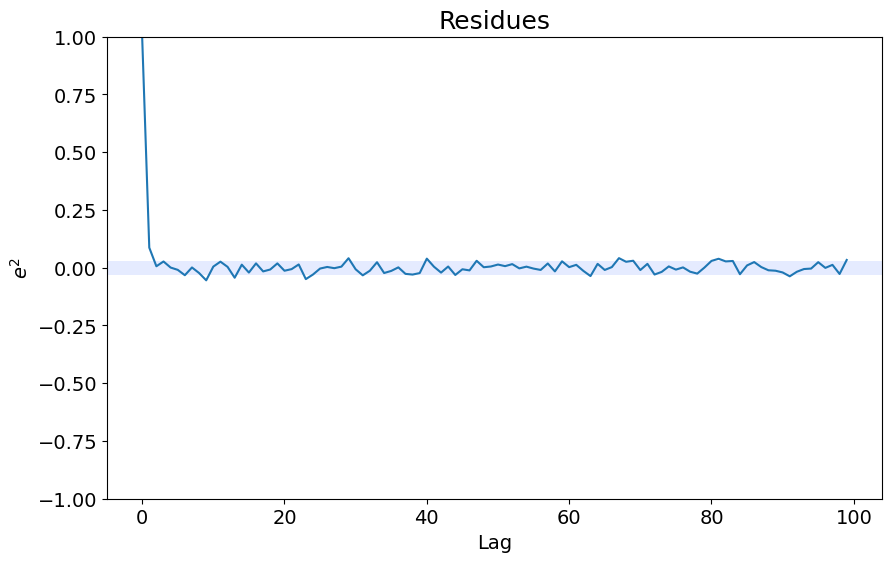

In [8]:
basis_function = Fourier(degree=1)

catboost_narx = NARX(
    base_estimator=CatBoostRegressor(iterations=300, learning_rate=0.1, depth=8),
    xlag=10,
    ylag=10,
    basis_function=basis_function,
    model_type="NARMAX",
    fit_params={"verbose": False},
)

catboost_narx.fit(X=x_train, y=y_train)
yhat = catboost_narx.predict(X=x_valid, y=y_valid, steps_ahead=1)
print("MSE: ", mean_squared_error(y_valid, yhat))
plot_results(y=y_valid, yhat=yhat, n=200)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

### NARX with Gradient Boosting

0.0011824693986863938


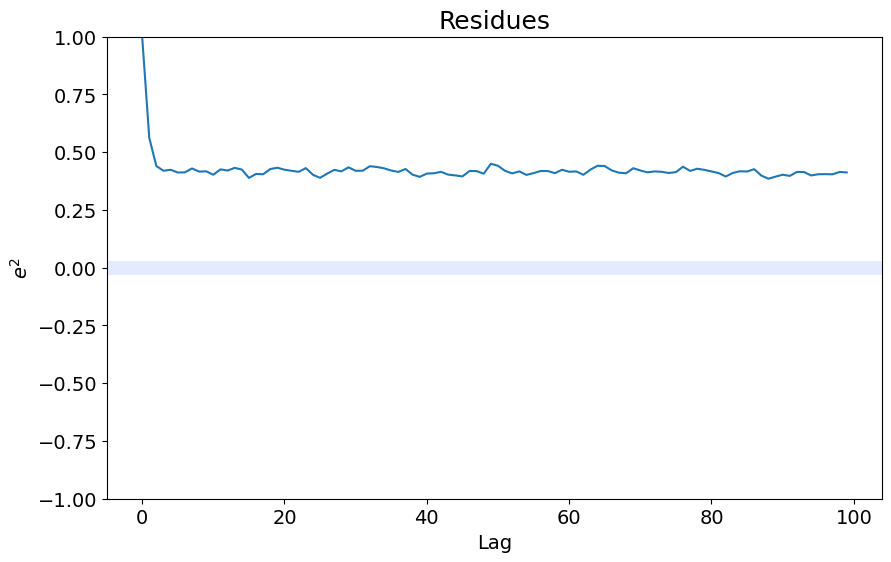

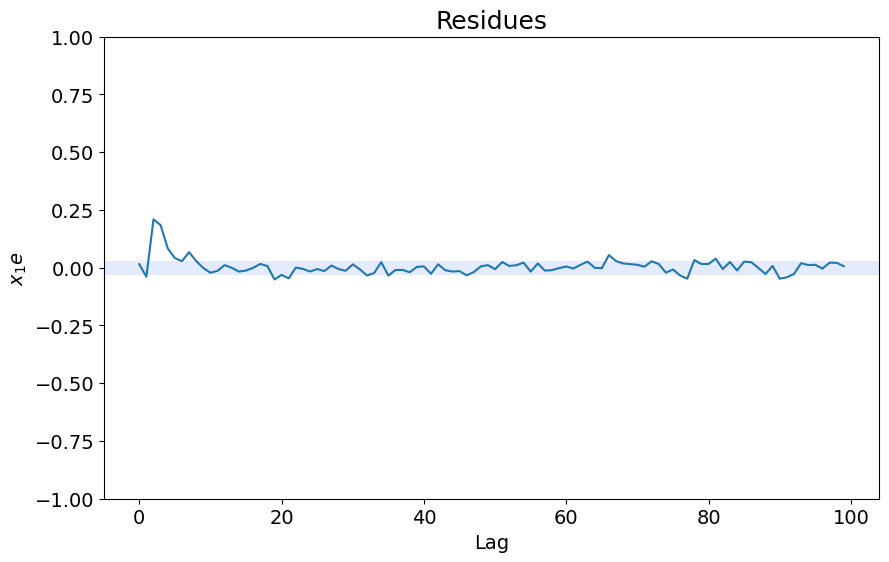

In [9]:
basis_function = Fourier(degree=1)

gb_narx = NARX(
    base_estimator=GradientBoostingRegressor(
        loss="quantile",
        alpha=0.90,
        n_estimators=250,
        max_depth=10,
        learning_rate=0.1,
        min_samples_leaf=9,
        min_samples_split=9,
    ),
    xlag=2,
    ylag=2,
    basis_function=basis_function,
    model_type="NARMAX",
)

gb_narx.fit(X=x_train, y=y_train)
yhat = gb_narx.predict(X=x_valid, y=y_valid)
print(mean_squared_error(y_valid, yhat))

plot_results(y=y_valid, yhat=yhat, n=200)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

### NARX with ARD

0.0011058934497373794


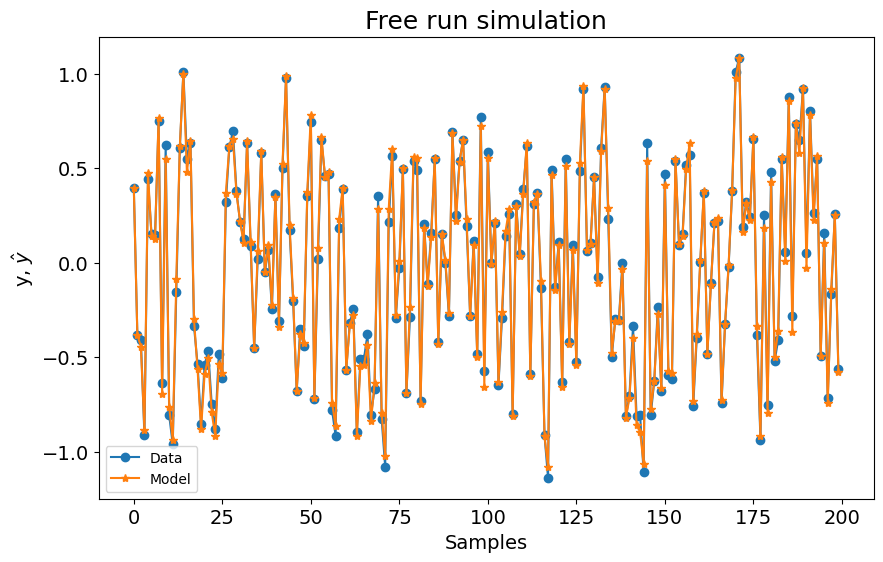

In [10]:
from sysidentpy.general_estimators import NARX

ARD_narx = NARX(
    base_estimator=ARDRegression(),
    xlag=2,
    ylag=2,
    basis_function=basis_function,
    model_type="NARMAX",
)

ARD_narx.fit(X=x_train, y=y_train)
yhat = ARD_narx.predict(X=x_valid, y=y_valid)
print(mean_squared_error(y_valid, yhat))

plot_results(y=y_valid, yhat=yhat, n=200)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

### NARX with Bayesian Ridge

0.0011077874945734536


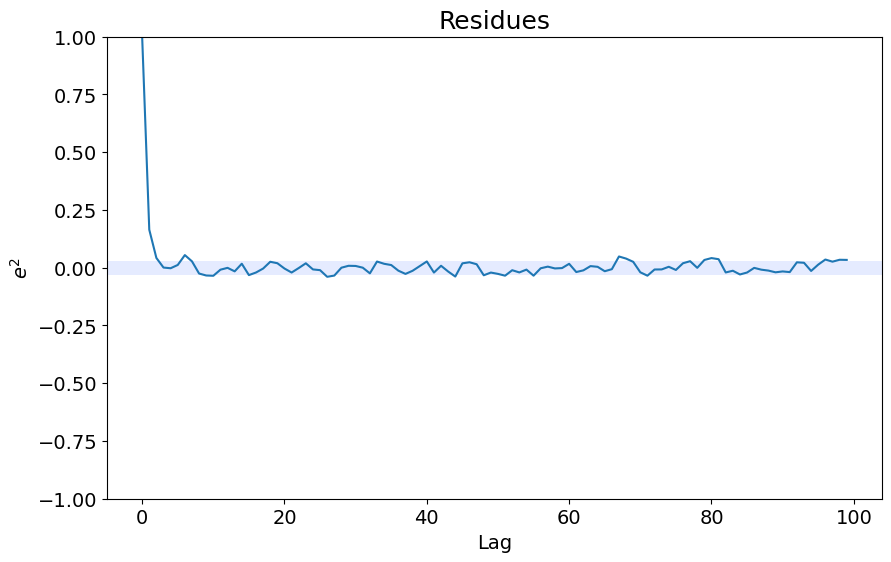

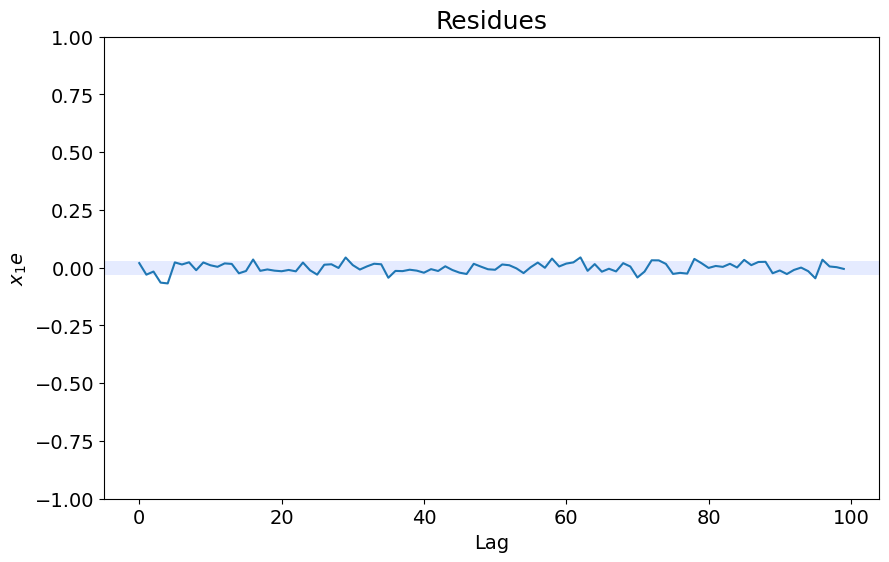

In [11]:
from sysidentpy.general_estimators import NARX

BayesianRidge_narx = NARX(
    base_estimator=BayesianRidge(),
    xlag=2,
    ylag=2,
    basis_function=basis_function,
    model_type="NARMAX",
)

BayesianRidge_narx.fit(X=x_train, y=y_train)
yhat = BayesianRidge_narx.predict(X=x_valid, y=y_valid)
print(mean_squared_error(y_valid, yhat))

plot_results(y=y_valid, yhat=yhat, n=200)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

# Note

Remember you can use n-steps-ahead prediction and NAR and NFIR models now. Check how to use it in their respective examples. 